<a href="https://colab.research.google.com/github/Hyunggilwoo/CSE351/blob/master/422_hw8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# create a matrix of the given graph
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math as m

# cycle graph of 13 by 13

def generate_markov_matrix(num):
  adjacency_matrix = np.zeros((num, num))
  markov_matrix = nx.cycle_graph(num)

  # replace the index with 0.5
  for u, v in markov_matrix.edges():
    markov_matrix[u][v]['weight'] = 0.5
  # must become adjacency matrix updating the edge value
  markov_matrix = nx.adjacency_matrix(markov_matrix)
  return adjacency_matrix + markov_matrix



In [ ]:
print(generate_markov_matrix(13))

[[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5]
 [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0. ]]


In [ ]:
def stationary_distribution(transition_matrix):
  '''
  input a numpy array
  '''
  eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
  stationary_distribution = np.array(eigenvectors[:, np.isclose(eigenvalues, 1)])
  stationary_distribution = stationary_distribution.flatten()
  stationary_distribution = stationary_distribution / stationary_distribution.sum()

  return stationary_distribution.real

transition_matrix = generate_markov_matrix(13)
print(stationary_distribution(transition_matrix))

[0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
 0.07692308]


In [ ]:
transition_matrix = generate_markov_matrix(12)
print(stationary_distribution(transition_matrix))

[0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]


In [ ]:
markov_chain_with_1edge = np.array([[0, 1/3, 0, 0, 0, 1/3, 0, 0, 0, 0, 0, 0, 1/3],
                                  [0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0],
                                  [1/3, 0, 0, 0, 1/3, 0, 1/3, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5],
                                  [0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0]])

In [ ]:
markov_chain_with_many_edge = np.array([[0, 1/3, 0, 0, 0, 1/3, 0, 0, 0, 0, 0, 0, 1/3],
                                  [1/3, 0, 1/3, 0, 0, 1/3, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0],
                                  [1/6, 1/6, 0, 0, 1/6, 0, 1/6, 0, 0, 1/6, 0, 1/6, 0],
                                  [0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 1/3, 0, 0, 1/3, 0, 1/3, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0],
                                  [0, 0, 0, 0, 0, 1/3, 0, 0, 0, 0, 1/3, 0, 1/3],
                                  [0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0]])

In [ ]:
markov_chain_with_2edge = np.array([[0, 1/3, 0, 0, 0, 1/3, 0, 0, 0, 0, 0, 0, 1/3],
                                  [1/3, 0, 1/3, 0, 1/3, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 1/3, 0, 1/3, 0, 1/3, 0, 0, 0, 0, 0, 0, 0],
                                  [1/3, 0, 0, 0, 1/3, 0, 1/3, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5],
                                  [0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0]])

In [ ]:
markov_chain_with_3edge = np.array([[0, 1/3, 0, 0, 0, 1/3, 0, 0, 0, 0, 0, 0, 1/3],
                                  [1/3, 0, 1/3, 0, 1/3, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 1/3, 0, 1/3, 0, 0, 0, 0, 0, 0, 0, 0, 1/3], # 3 - 13
                                  [0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
                                  [0, 1/3, 0, 1/3, 0, 1/3, 0, 0, 0, 0, 0, 0, 0],
                                  [1/3, 0, 0, 0, 1/3, 0, 1/3, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5],
                                  [1/3, 0, 1/3, 0, 0, 0, 0, 0, 0, 0, 0, 1/3, 0]]) # 13 - 3

In [ ]:
print(stationary_distribution(markov_chain_with_1edge))

[0.10714286 0.07142857 0.07142857 0.07142857 0.07142857 0.10714286
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857]


In [ ]:
print(stationary_distribution(markov_chain_with_many_edge))

[0.08823529 0.08823529 0.05882353 0.05882353 0.05882353 0.17647059
 0.05882353 0.05882353 0.05882353 0.08823529 0.05882353 0.08823529
 0.05882353]


In [ ]:
print(markov_chain_with_1edge)

[[0.         0.33333333 0.         0.         0.         0.33333333
  0.         0.         0.         0.         0.         0.
  0.33333333]
 [0.5        0.         0.5        0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.5        0.         0.5        0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.5        0.         0.5        0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.5        0.         0.5
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.33333333 0.         0.         0.         0.33333333 0.
  0.33333333 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.5
  0.         0.5        0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.    

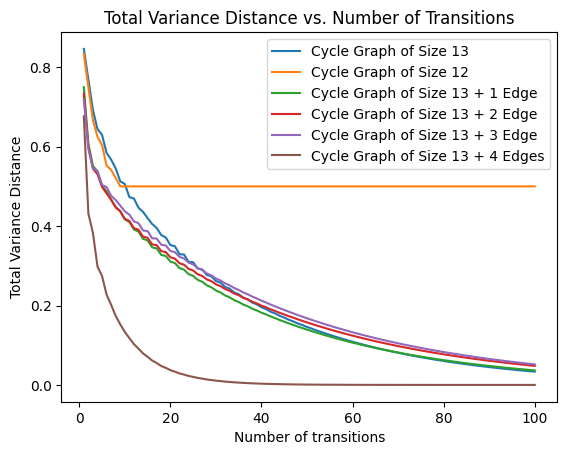

In [ ]:
# 1b) print the total variance
t = 101
transition_matrix1 = generate_markov_matrix(13)

transition_matrix2 = generate_markov_matrix(12)
transition_matrix3 = markov_chain_with_1edge

transition_matrix4 = markov_chain_with_many_edge
transition_matrix5 = markov_chain_with_2edge
transition_matrix6 = markov_chain_with_3edge


v1 = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
v2 = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

def total_variance_calculation(transition_matrix, v, t):
  '''
  Calculate the total variance of Markov chain with stationary distribution
  '''
  stationary_d = stationary_distribution(transition_matrix)
  tv_diff_list = []
  for i in range(1, t):
    state_distribution = np.dot(v, np.linalg.matrix_power(transition_matrix ,i))
    absolute_diff = np.abs(state_distribution - stationary_d)

    tv_diff = 1/2 * np.linalg.norm(absolute_diff, ord=1)
    tv_diff_list.append(tv_diff)
  return tv_diff_list

def total_variance_with_uniform_distribution(transition_matrix):
  t = 101
  v1 = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  stationary_d = np.full(v1.size, 1/v1.size)
  tv_diff_list = []

  for i in range(1, t):
    state_distribution = np.dot(v, np.linalg.matrix_power(transition_matrix ,i))
    absolute_diff = np.abs(state_distribution - stationary_d)

    tv_diff = 1/2 * np.linalg.norm(absolute_diff, ord=1)
    tv_diff_list.append(tv_diff)
  return tv_diff_list

plt.plot(range(1, t), total_variance_calculation(transition_matrix1, v1, t), label='Cycle Graph of Size 13')
plt.plot(range(1, t), total_variance_calculation(transition_matrix2, v2, t), label='Cycle Graph of Size 12')
plt.plot(range(1, t), total_variance_calculation(transition_matrix3, v1, t), label='Cycle Graph of Size 13 + 1 Edge')
plt.plot(range(1, t), total_variance_calculation(transition_matrix5, v1, t), label='Cycle Graph of Size 13 + 2 Edge')
plt.plot(range(1, t), total_variance_calculation(transition_matrix6, v1, t), label='Cycle Graph of Size 13 + 3 Edge')
plt.plot(range(1, t), total_variance_calculation(transition_matrix4, v1, t), label='Cycle Graph of Size 13 + 4 Edges')
# plt.plot(range(1, t), total_variance_with_uniform_distribution(transition_matrix3), label= 'Cycle Graph of Size 13 and Edge')

plt.xlabel('Number of transitions')
plt.ylabel('Total Variance Distance')
plt.legend()
plt.title('Total Variance Distance vs. Number of Transitions')
plt.show()
# print(state_distribution)

In [ ]:
#1c) Calculate the second largest eigenvalue from the matrix
transition_matrix1 = generate_markov_matrix(13)

transition_matrix2 = generate_markov_matrix(12)
transition_matrix3 = markov_chain_with_1edge
transition_matrix4 = markov_chain_with_many_edge

def calculate_eigenvalues(transition_matrix):
  eigenvalues, eigenvectors = np.linalg.eig(transition_matrix)

  sorted_eigenvalue = np.sort(eigenvalues)[::-1]
  second_largest_eigenvalue = sorted_eigenvalue[1]

  return second_largest_eigenvalue

print(calculate_eigenvalues(transition_matrix1))
print(calculate_eigenvalues(transition_matrix2))
print(calculate_eigenvalues(transition_matrix3))
print(calculate_eigenvalues(transition_matrix4))
print(calculate_eigenvalues(transition_matrix5))
print(calculate_eigenvalues(transition_matrix6))


0.8854560256532102
0.8660254037844392
0.8875967702354787
0.7993325383732115
0.8954372000497579
0.8729133823228465


In [ ]:
import math as m
import random as r
# problem 2
# design a short tour of the 30 national parks
# distance = sqrt((long1 - long2)^2 + (lat1 - lat2)^2)

filename = '/content/parks.csv'
dtype = [('text_column', 'U10'), ('numeric_column_1', float), ('numeric_column_2', float)]
usecols = (0,2)
data = np.genfromtxt(filename, delimiter=',', dtype=dtype, names=True)

print(data)

[('Acadia',  -68.21, 44.35) ('Arches', -109.57, 38.68)
 ('Badlands', -102.5 , 43.75) ('Big Bend', -103.25, 29.25)
 ('Black Cany', -107.72, 38.57) ('Bryce Cany', -112.18, 37.57)
 ('Canyonland', -109.93, 38.2 ) ('Crater Lak', -122.1 , 42.94)
 ('Cuyahoga V',  -81.55, 41.24) ('Everglades',  -80.93, 25.32)
 ('Glacier', -114.  , 48.8 ) ('Grand Cany', -112.14, 36.06)
 ('Grand Teto', -110.8 , 43.73) ('Great Sand', -105.51, 37.73)
 ('Great Smok',  -83.53, 35.68) ('Hot Spring',  -93.05, 34.51)
 ('Isle Royal',  -88.55, 48.1 ) ('Joshua Tre', -115.9 , 33.79)
 ('Lassen Vol', -121.51, 40.49) ('Mesa Verde', -108.49, 37.18)
 ('Mount Rain', -121.75, 46.85) ('North Casc', -121.2 , 48.7 )
 ('Olympic', -123.5 , 47.97) ('Pinnacles', -121.16, 36.48)
 ('Rocky Moun', -105.58, 40.4 ) ('Sequoia', -118.68, 36.43)
 ('Voyageurs',  -92.88, 48.5 ) ('Yellowston', -110.5 , 44.6 )
 ('Yosemite', -119.5 , 37.83) ('Zion', -113.05, 37.3 )]


In [ ]:
# checking that I can access the values correctly
def calculate_distance(i, j, data):
  '''
  calculates current_distance
  i must be 1st index
  '''
  current_distance = 0
  row1 = data[i]
  row2 = data[j]

  name1, long1, lat1 = row1
  name2, long2, lat2 = row2
  current_distance = m.sqrt(m.pow(long1 - long2, 2) + m.pow(lat1 - lat2, 2))
  return current_distance

def calculate_total_distance(data):
  '''
  i >= 1. Indexing from 1st index
  '''
  total_distance = 0

  # calculates the total distance traveled from start to finish
  for i in range(1, len(data)):
    total_distance += calculate_distance(i, i -1, data)
  # adds a distance traveled from last visit to the first one
  total_distance += calculate_distance(0, data.size - 1, data)

  return total_distance

print(calculate_total_distance(data))

491.91817144615453


In [ ]:
# 2a
n = data.size

probabilities = np.full(n, 1/n)

np.random.shuffle(probabilities)

print(probabilities)

[0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333]


In [ ]:
# fix:
def swap(data):
  '''
  pre: must send a copy of a data. ow, it will not update the information correctly
  swaps the order of data. Requires to create a copy of the data
  '''
  data_copy = data.copy()

  # random index
  index = r.randint(0, len(data) - 2)

  pair = data_copy[index : index + 2]
  # print(f"Before Swap: {pair[0]} and {pair[1]}")
  f_pair = pair[0]
  s_pair = pair[1]

  data[index] = s_pair
  data[index + 1] = f_pair

  # print(f"After swap: {data[index]} and {data[index+1]}")
  return data_copy
print(swap(data))

[('Acadia',  -68.21, 44.35) ('Arches', -109.57, 38.68)
 ('Badlands', -102.5 , 43.75) ('Big Bend', -103.25, 29.25)
 ('Black Cany', -107.72, 38.57) ('Bryce Cany', -112.18, 37.57)
 ('Canyonland', -109.93, 38.2 ) ('Crater Lak', -122.1 , 42.94)
 ('Cuyahoga V',  -81.55, 41.24) ('Everglades',  -80.93, 25.32)
 ('Glacier', -114.  , 48.8 ) ('Grand Cany', -112.14, 36.06)
 ('Grand Teto', -110.8 , 43.73) ('Great Sand', -105.51, 37.73)
 ('Great Smok',  -83.53, 35.68) ('Hot Spring',  -93.05, 34.51)
 ('Isle Royal',  -88.55, 48.1 ) ('Joshua Tre', -115.9 , 33.79)
 ('Lassen Vol', -121.51, 40.49) ('Mesa Verde', -108.49, 37.18)
 ('Mount Rain', -121.75, 46.85) ('North Casc', -121.2 , 48.7 )
 ('Olympic', -123.5 , 47.97) ('Pinnacles', -121.16, 36.48)
 ('Rocky Moun', -105.58, 40.4 ) ('Sequoia', -118.68, 36.43)
 ('Voyageurs',  -92.88, 48.5 ) ('Yellowston', -110.5 , 44.6 )
 ('Yosemite', -119.5 , 37.83) ('Zion', -113.05, 37.3 )]


In [ ]:

def swap_random(data):
  '''
  pre: must send a copy of a data. ow, it will not update the information correctly
  swaps the order of data. Requires to create a copy of the data
  '''
  data_copy = data.copy()

  # random index
  index1 = r.randint(0, len(data)-1)

  index2 = index1
  while index1 == index2:
    index2 = r.randint(0, len(data)-1)

  data_copy[index1], data_copy[index2] = data_copy[index2], data_copy[index1]

  return data_copy

In [ ]:
# dataset = [1, 2, 3, 4, 5]
# result = swap(dataset)
# print(f"Result: {result}")

0
1 and 2
swapped pair: 2 and 1
Result: [2, 1, 3, 4, 5]


In [ ]:
#2a) MCMC algorithm

def markov_chain_monte_carlo(data, T, NUMITER):
  '''
  Returns a list of number of iteration and corresponding T value
  '''
  total_distance = 0
  # initial tour
  best_tour = data.copy()
  # print(best_tour)
  best_distance = calculate_total_distance(best_tour) # initial data
  new_distance_list = []
  num_iteration_list = list(range(0, NUMITER + 1))

  # calculates the total distance traveled from start to finish
  for j in range(NUMITER + 1):
    # best_distance =
    # swap the new tour
    new_tour = swap(data)
    new_distance = calculate_total_distance(new_tour)
    new_distance_list.append(new_distance) # necessary for 2b)
    # update to a lower distance
    if new_distance < best_distance:
      best_distance = new_distance
      # swap the tour with a certain probability
      data = new_tour
    else:
      if T > 0:
        # given a certain percentage, updates the value with a random chance
        diff = new_distance - best_distance
        probability = m.exp(-diff/T)

        if r.random() < probability:
          data = new_tour
          best_distance = new_distance

  return best_tour, best_distance, new_distance_list, num_iteration_list


In [ ]:
print(data[0])

('Acadia', -68.21, 44.35)


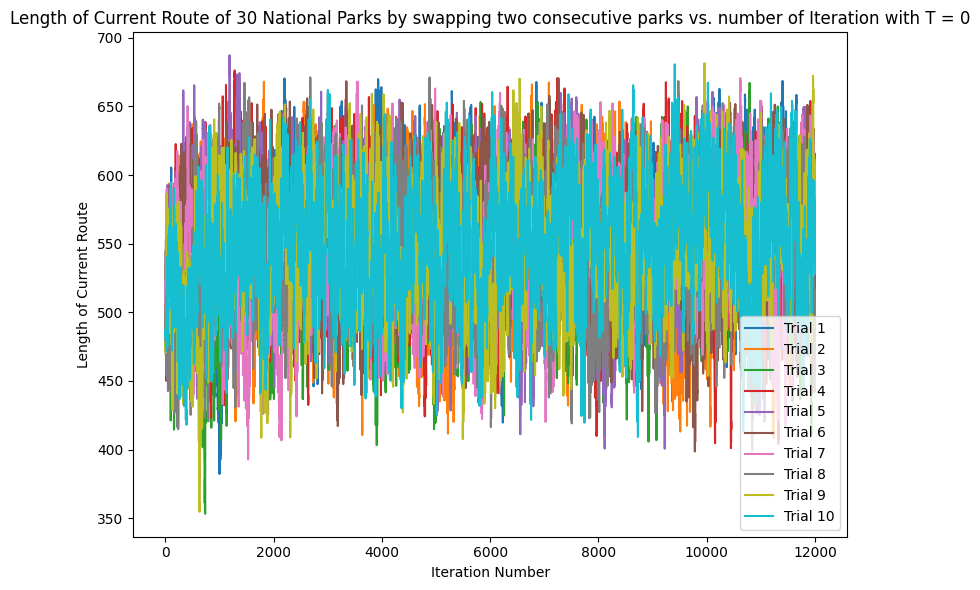

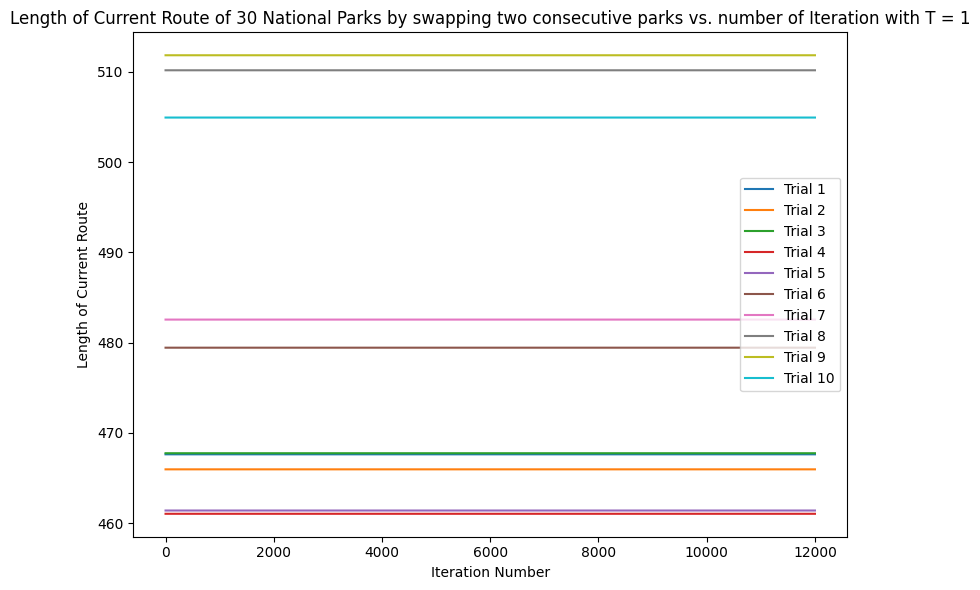

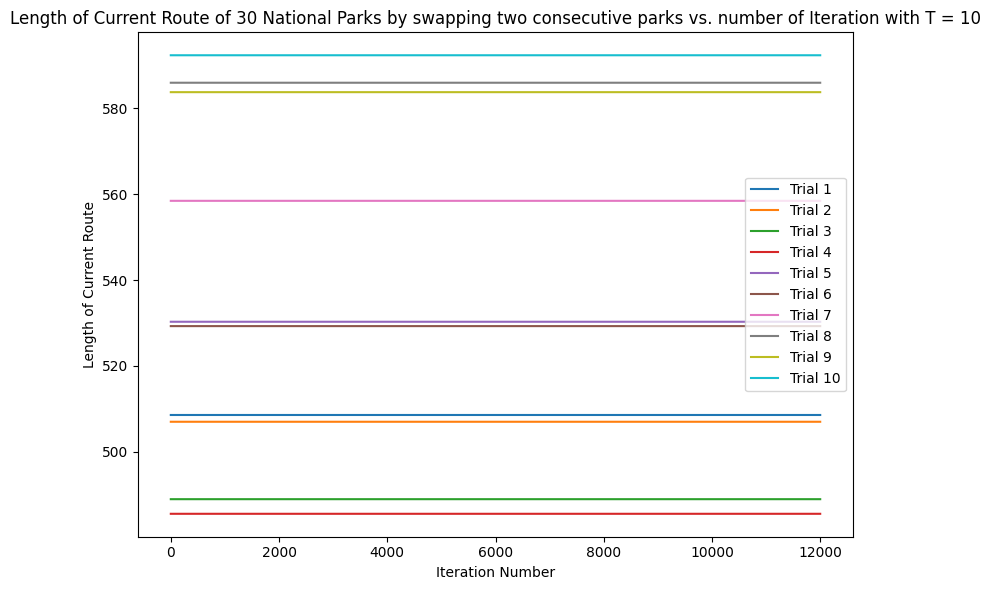

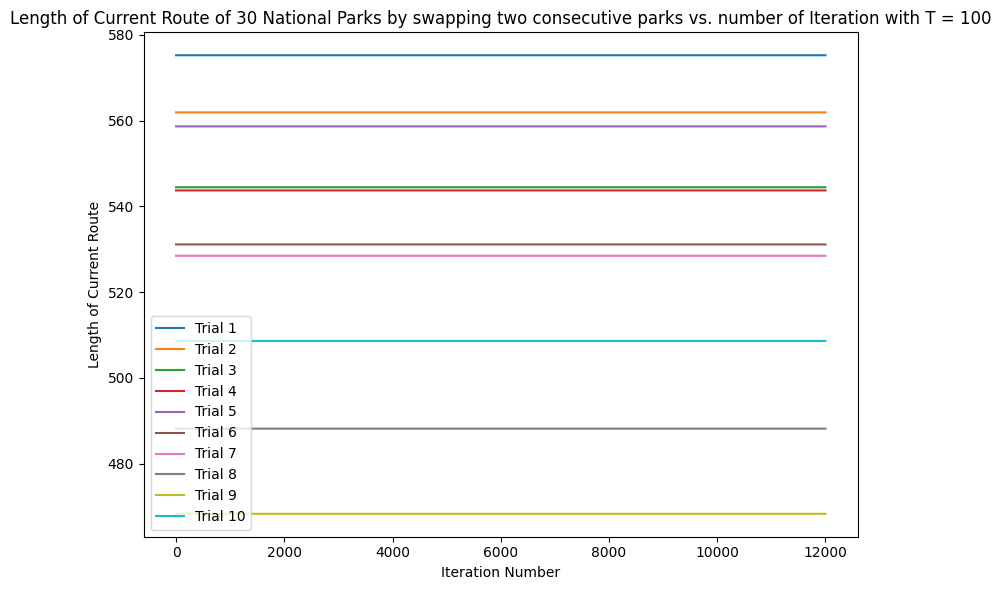

In [ ]:
# 2b)
# for each T value run 10 trials
# draw a line for each number of Iteration
T_list = [0, 1, 10, 100]
NUMITER = 12000
num = 10
for j in range(len(T_list)):
  T = T_list[j]
  new_distance_list = []
  num_iteration_list = []
  plt.figure(figsize=(8, 6))
  plt.title(f"Length of Current Route of 30 National Parks by swapping two consecutive parks vs. number of Iteration with T = {T}")

  for i in range(num):


    best_tour, best_distance, new_distance_list, num_iteration_list = markov_chain_monte_carlo(data, T, NUMITER)
    # print(num_iteration_list)
    plt.plot(num_iteration_list, new_distance_list, label=f"Trial {i+1}")

  plt.xlabel("Iteration Number")
  plt.ylabel("Length of Current Route")
  plt.legend()
    # distance_list.append(distance)

    # ax = axs[i]
    # ax.plot(num_iteration_list, new_distance_list, label=f"{i+1}")


  plt.tight_layout()
  plt.show()

In [ ]:
#2a) MCMC algorithm

def markov_chain_monte_carlo_random(data, T, NUMITER):
  '''
  Returns a list of number of iteration and corresponding T value
  '''
  total_distance = 0
  # initial tour
  best_tour = data.copy()
  best_distance = calculate_total_distance(best_tour) # initial data
  new_distance_list = []
  num_iteration_list = list(range(0, NUMITER + 1))

  # calculates the total distance traveled from start to finish
  for j in range(NUMITER + 1):
    # best_distance =
    new_tour = swap_random(data)
    new_distance = calculate_total_distance(new_tour)
    new_distance_list.append(new_distance) # necessary for 2b)
    # update to a lower distance
    if new_distance < best_distance:
      best_distance = new_distance
    elif T > 0:
      # given a certain percentage, updates the value with a random chance
      diff = new_distance - best_distance
      probability = m.exp(-diff/T)

      if r.random() < probability:
        best_tour = new_tour
        best_distance = new_distance

  return best_tour, best_distance, new_distance_list, num_iteration_list


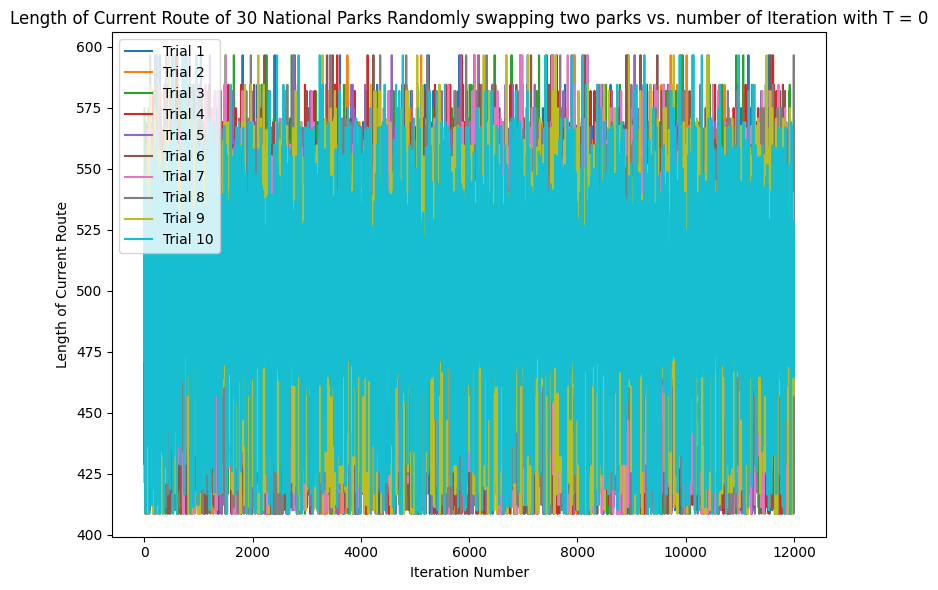

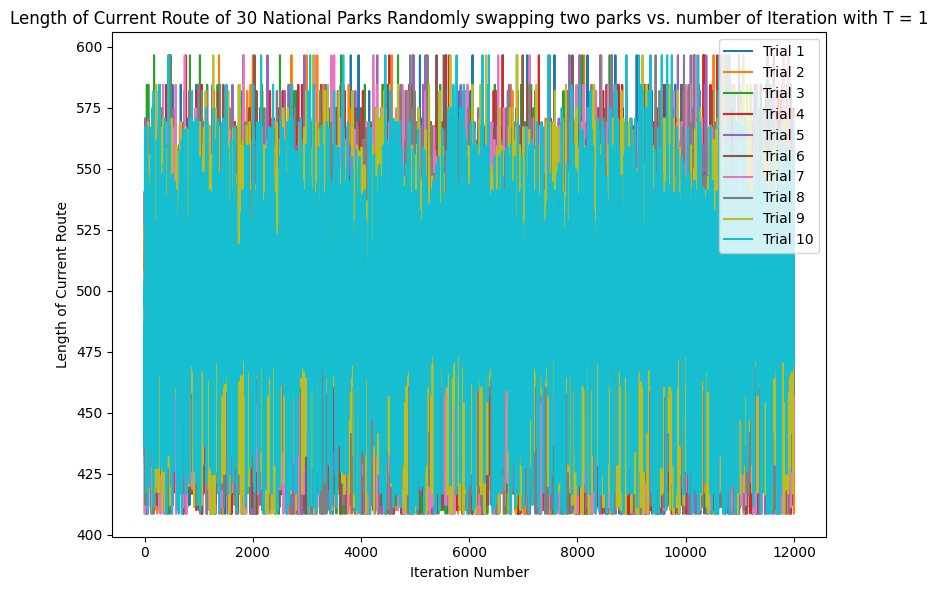

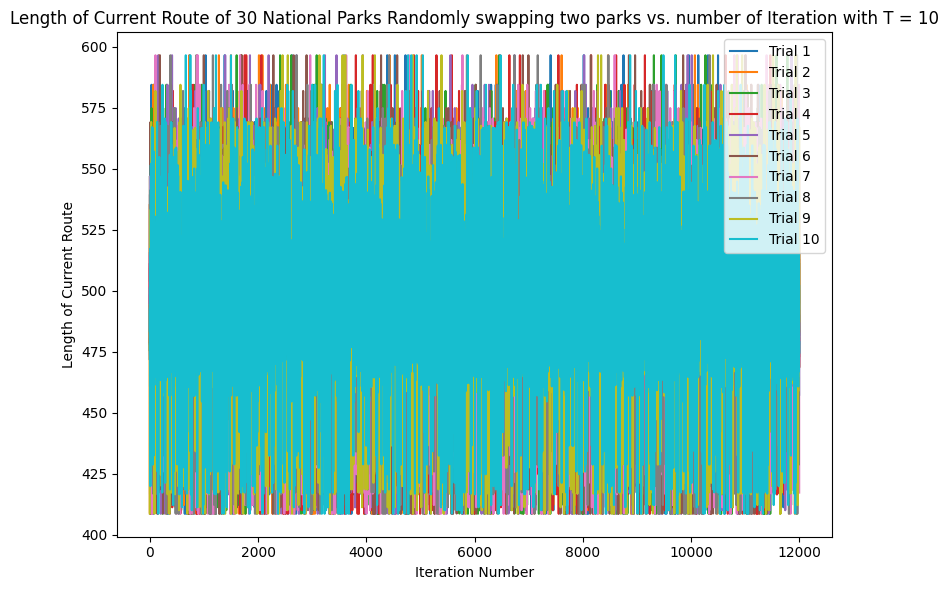

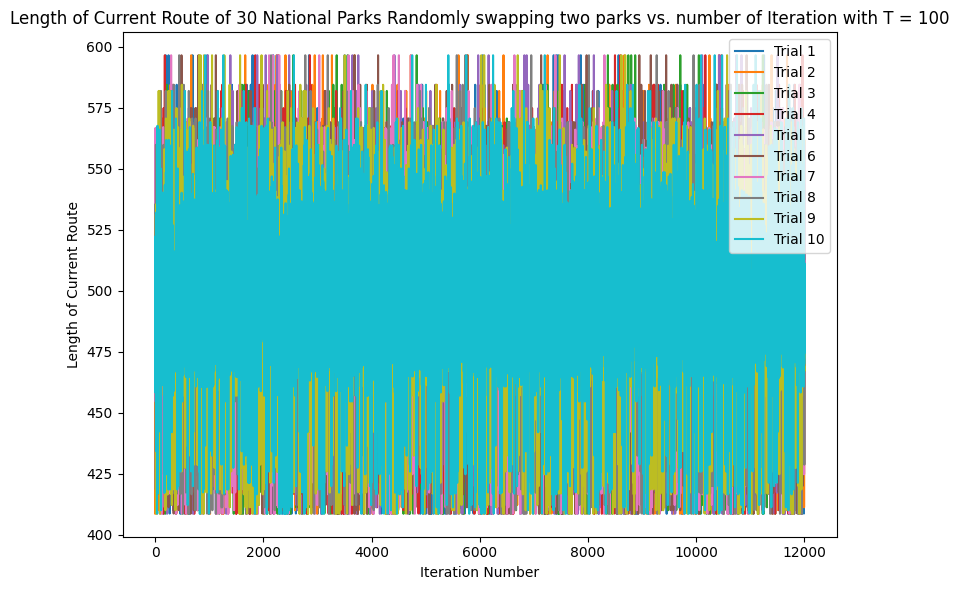

In [ ]:
#2c) random indices
# for each T value run 10 trials
# draw a line for each number of Iteration
T_list = [0, 1, 10, 100]
NUMITER = 12000
num = 10
for j in range(len(T_list)):
  T = T_list[j]
  new_distance_list = []
  num_iteration_list = []
  plt.figure(figsize=(8, 6))
  plt.title(f"Length of Current Route of 30 National Parks Randomly swapping two parks vs. number of Iteration with T = {T}")

  for i in range(num):


    best_tour, best_distance, new_distance_list, num_iteration_list = markov_chain_monte_carlo_random(data, T, NUMITER)
    # print(num_iteration_list)
    plt.plot(num_iteration_list, new_distance_list, label=f"Trial {i+1}")
  plt.xlabel("Iteration Number")
  plt.ylabel("Length of Current Route")
  plt.legend()
    # distance_list.append(distance)

    # ax = axs[i]
    # ax.plot(num_iteration_list, new_distance_list, label=f"{i+1}")


  plt.tight_layout()
  plt.show()

Problem 2b. Ruijin Ye

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# import the csv file
parks = pd.read_csv('parks.csv')
parks = parks.to_numpy()
#Name	Longitude	Latitude
parks

array([['Acadia', -68.21, 44.35],
       ['Arches', -109.57, 38.68],
       ['Badlands', -102.5, 43.75],
       ['Big Bend', -103.25, 29.25],
       ['Black Canyon of the Gunnison', -107.72, 38.57],
       ['Bryce Canyon', -112.18, 37.57],
       ['Canyonlands', -109.93, 38.2],
       ['Crater Lake', -122.1, 42.94],
       ['Cuyahoga Valley', -81.55, 41.24],
       ['Everglades', -80.93, 25.32],
       ['Glacier', -114.0, 48.8],
       ['Grand Canyon', -112.14, 36.06],
       ['Grand Teton', -110.8, 43.73],
       ['Great Sand Dunes', -105.51, 37.73],
       ['Great Smoky Mountains', -83.53, 35.68],
       ['Hot Springs', -93.05, 34.51],
       ['Isle Royale', -88.55, 48.1],
       ['Joshua Tree', -115.9, 33.79],
       ['Lassen Volcanic', -121.51, 40.49],
       ['Mesa Verde', -108.49, 37.18],
       ['Mount Rainier', -121.75, 46.85],
       ['North Cascades', -121.2, 48.7],
       ['Olympic', -123.5, 47.97],
       ['Pinnacles', -121.16, 36.48],
       ['Rocky Mountain', -105.58, 40.

In [ ]:
def calculate_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lon1 - lon2)**2 + (lat1 - lat2)**2)

all_dist = {}

for park1 in range(len(parks)):
    all_dist[park1] = []
    for park2 in range(len(parks)):
        all_dist[park1].append(calculate_distance(parks[park1,2], parks[park1, 1], parks[park2, 2], parks[park2, 1]))



In [ ]:
# function to calculate the total length of a tour
def get_tour_length(tour):
    tour_all = 0

    for i,park in enumerate(tour):
        if i == 29:
            tour_all += all_dist[park][tour[0]]
        else:
            tour_all += all_dist[park][tour[i+1]]
    # if i == 29:
    #     tour_all += all_dist[i][tour]
    # for i in range(len(tour)-1):
    #     total_length += distance(parks[tour[i]], parks[tour[i+1]])
    return tour_all


In [ ]:
get_tour_length(range(30))

491.91817144615453

In [ ]:
def mcmc(T, NUMITER, random = False):
    # start with uniformly random permutation of parks
    tau = np.random.permutation(30)
    cur_tour_length = get_tour_length(tau)
    # best
    best_tour = tau
    best_tour_length = cur_tour_length
    tour_length_history = [cur_tour_length]
    for i in range(NUMITER):
        if random:
            p1, p2 = np.random.choice(len(tau), size = 2, replace = False)
        # Choose a uniformly random pair of consecutive parks in your current tour τ
        else:
            p1 = np.random.choice(len(tau))
            p2 = (p1 + 1) % len(tau)
        tau_new = tau.copy()
        # switching the order of those two parks
        tau_new[p1] = tau[p2]
        tau_new[p2] = tau[p1]

        # if τ' has lower total length than the current tour  τ set t to t'
        new_tour_length = get_tour_length(tau_new)
        if new_tour_length < cur_tour_length:
            tau = tau_new
            cur_tour_length = new_tour_length
        elif T > 0:
            prob = np.exp(-(new_tour_length - cur_tour_length) / T)
            if np.random.uniform() < prob:
                tau = tau_new
                cur_tour_length = new_tour_length

        # update best_tour
        if new_tour_length < best_tour_length:
            best_tour = tau_new
            best_tour_length = new_tour_length
        tour_length_history.append(cur_tour_length)


    return best_tour, best_tour_length, tour_length_history




### (2b)

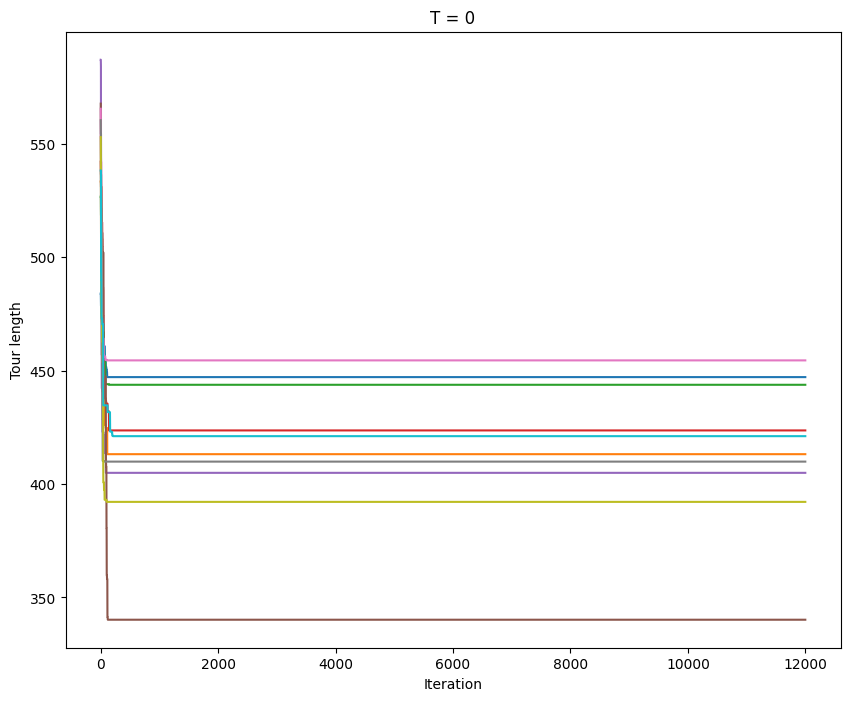

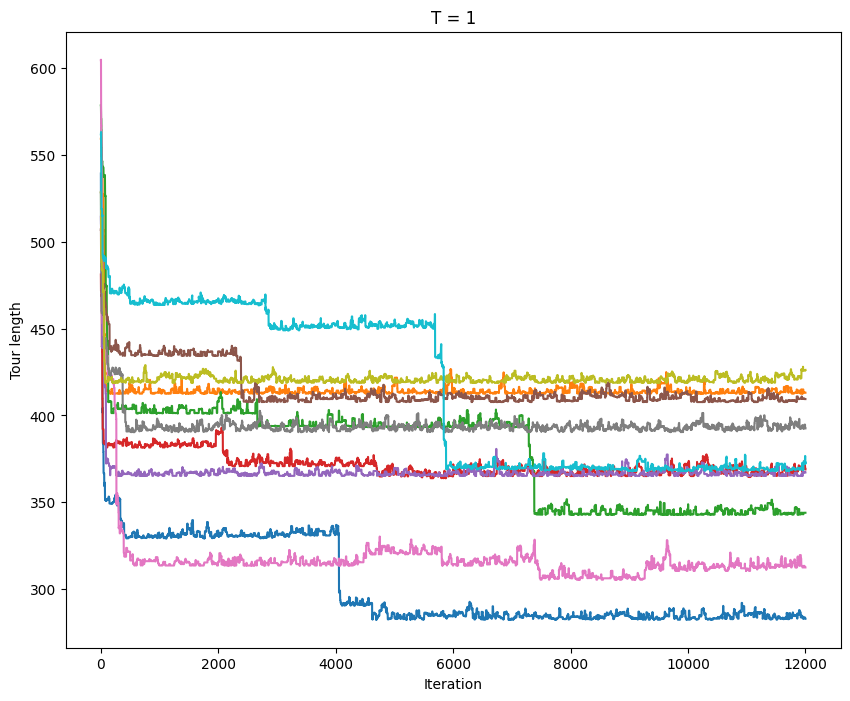

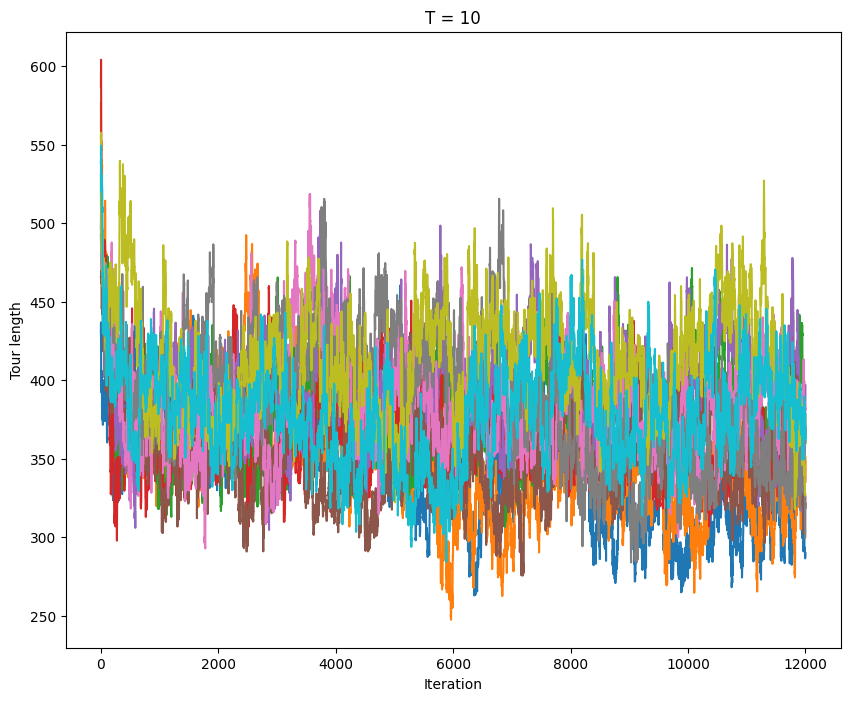

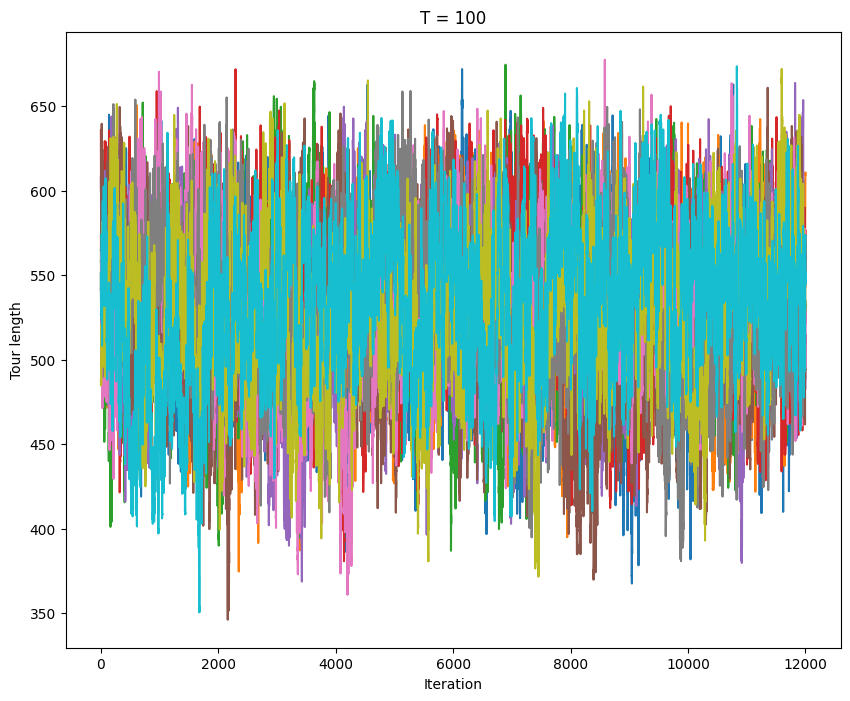

In [ ]:
num = 12000
T = [0, 1, 10, 100]


for t in T:
    plt.figure(figsize = (10,8))
    for i in range(10):
        best_tour, best_tour_length, tour_length_history = mcmc(T = t, NUMITER = 12000)
        plt.plot(np.arange(len(tour_length_history)),tour_length_history)

    plt.title(f'T = {t}')
    plt.xlabel('Iteration')
    plt.ylabel('Tour length')
    #plt.savefig(f'T = {t}.png'.format(t = t))
    plt.show()



### 2c

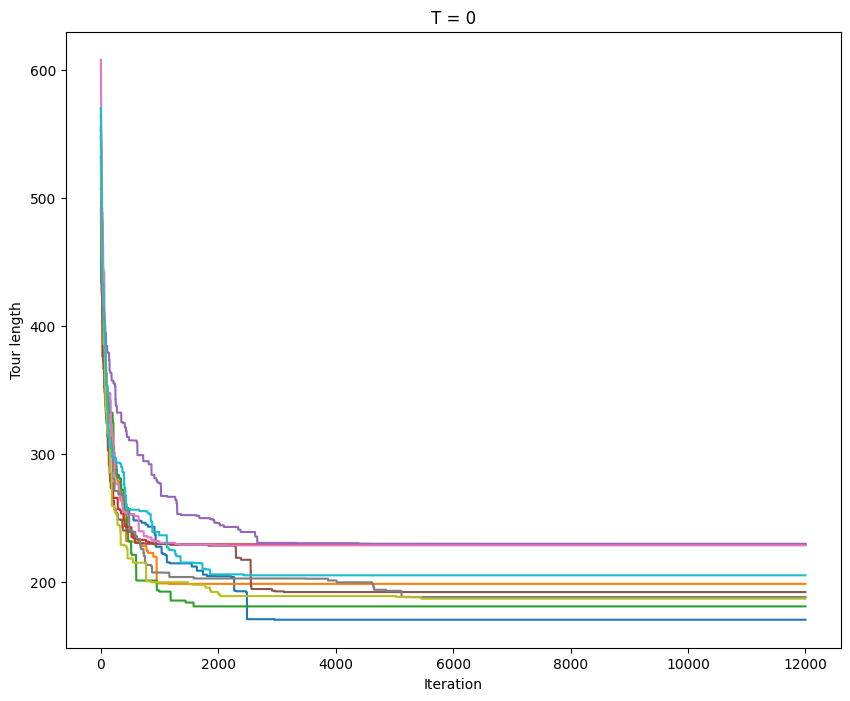

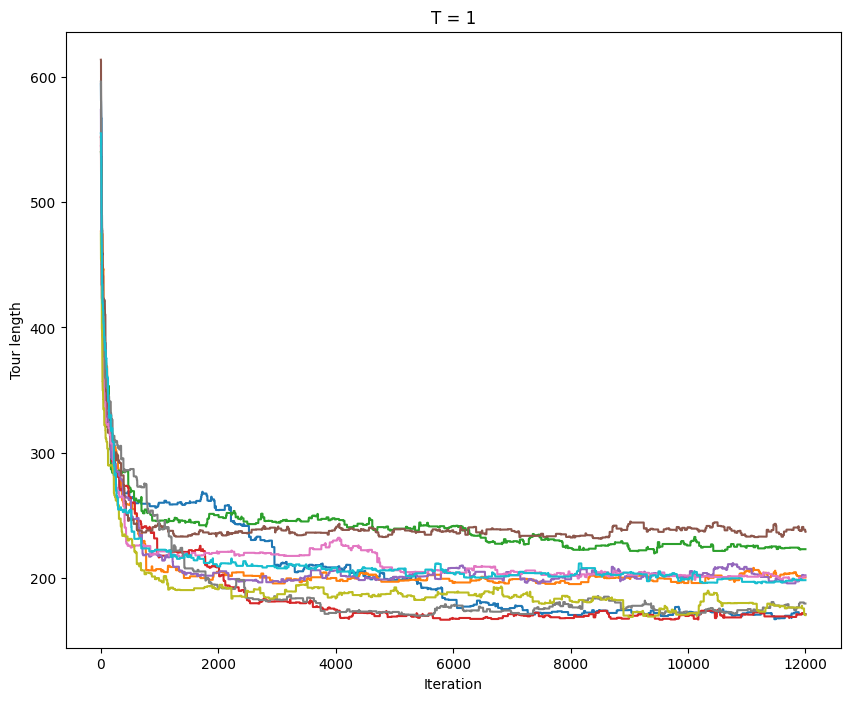

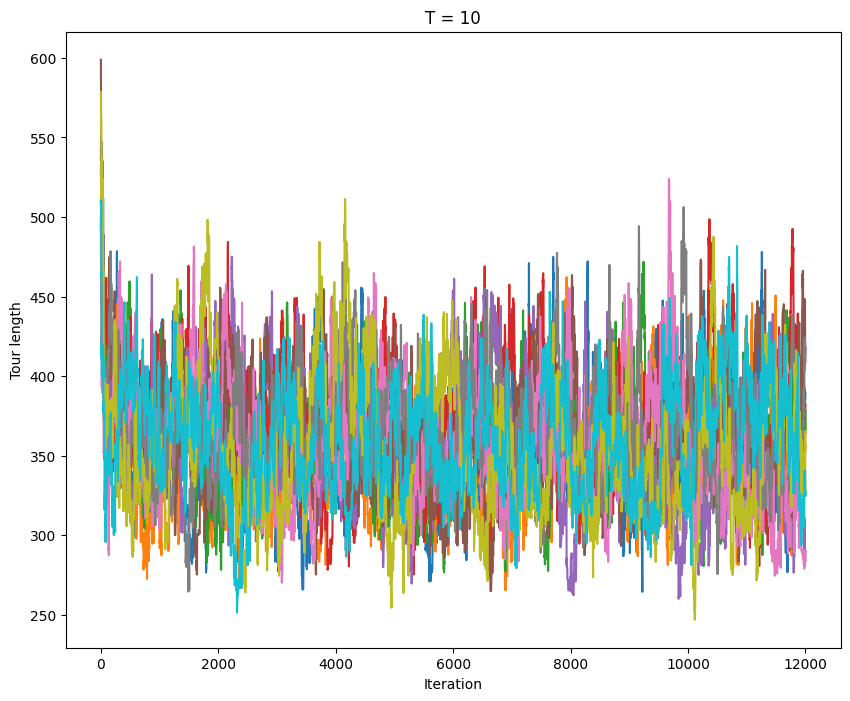

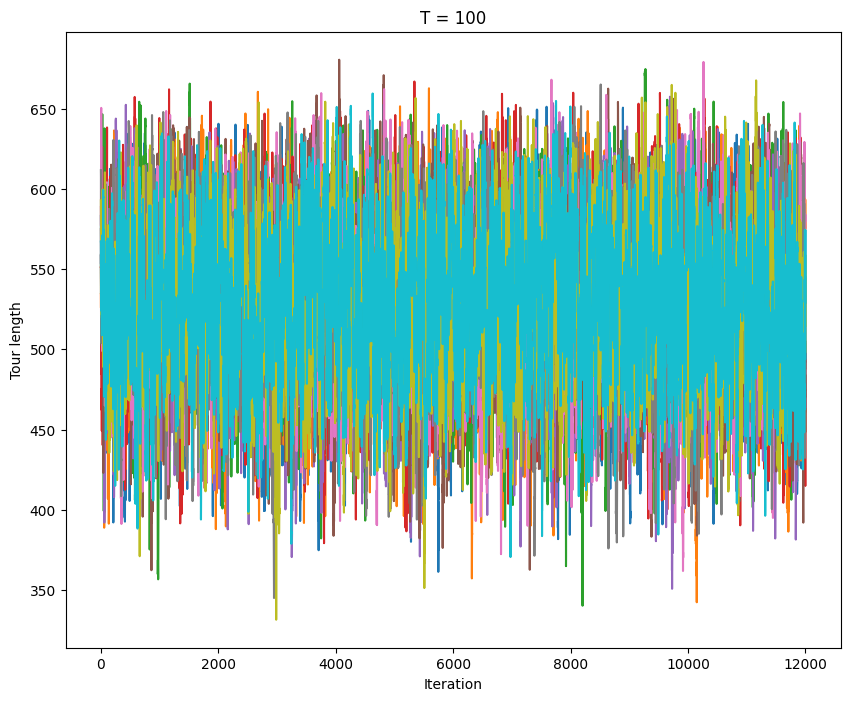

In [ ]:
# 2c

# select two parks completely at random

for t in T:
    plt.figure(figsize = (10,8))
    for i in range(10):
        best_tour, best_tour_length, tour_length_history = mcmc(T = t, NUMITER = 12000, random = True)
        plt.plot(np.arange(len(tour_length_history)),tour_length_history)

    plt.title(f'T = {t}')
    plt.xlabel('Iteration')
    plt.ylabel('Tour length')
    #plt.savefig(f'2c:T = {t}.png'.format(t = t))
    plt.show()


